# Soal

1. Tabel data

<table border="1" cellpadding="6" cellspacing="0" style="margin: 20, 0, 0, 0;">
  <thead style="background-color: red;">
    <tr>
      <th rowspan="2">no.</th>
      <th rowspan="2">koordinat x,y</th>
      <th colspan="3">kelompok cluster</th>
    </tr>
    <tr style="background-color: black;">
      <th>K1</th>
      <th>K2</th>
      <th>K3</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td align="center">1</td>
      <td align="center">1,1</td>
      <td align="center">True</td>
      <td></td>
      <td></td>
    </tr>
    <tr>
      <td align="center">2</td>
      <td align="center">4,1</td>
      <td></td>
      <td></td>
      <td align="center">True</td>
    </tr>
    <tr>
      <td align="center">3</td>
      <td align="center">6,1</td>
      <td></td>
      <td align="center">True</td>
      <td></td>
    </tr>
    <tr>
      <td align="center">4</td>
      <td align="center">1,2</td>
      <td></td>
      <td align="center">True</td>
      <td></td>
    </tr>
    <tr>
      <td align="center">5</td>
      <td align="center">2,3</td>
      <td></td>
      <td></td>
      <td align="center">True</td>
    </tr>
    <tr>
      <td align="center">6</td>
      <td align="center">5,3</td>
      <td></td>
      <td align="center">True</td>
      <td></td>
    </tr>
    <tr>
      <td align="center">7</td>
      <td align="center">2,5</td>
      <td></td>
      <td align="center">True</td>
      <td></td>
    </tr>
    <tr>
      <td align="center">8</td>
      <td align="center">3,5</td>
      <td></td>
      <td></td>
      <td align="center">True</td>
    </tr>
    <tr>
      <td align="center">9</td>
      <td align="center">2,6</td>
      <td></td>
      <td></td>
      <td align="center">True</td>
    </tr>
    <tr>
      <td align="center">10</td>
      <td align="center">3,8</td>
      <td></td>
      <td align="center">True</td>
      <td></td>
    </tr>
  </tbody>
</table>

### hasil :
- data akan dikelompokkan menjadi 3
- iterasi berhenti ketika perpindahan centroid tidak lebih dari 0.1

---

### Jawaban : 

1. fungsi numpy : operasi vektorisasi ( lebih cepat untuk data array)
2. fungsi matplotlib : menampilkan data dalam bentuk diagram

In [2]:
import numpy as np
import matplotlib.pyplot as plt

menyimpan data dalam bentuk array 2d

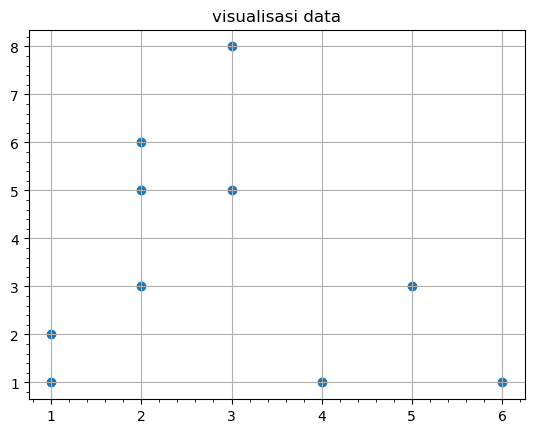

In [3]:
data = np.array([
    [1,1],
    [4,1],
    [6,1],
    [1,2],
    [2,3],
    [5,3],
    [2,5],
    [3,5],
    [2,6],
    [3,8],
])

fig, ax = plt.subplots()

ax.scatter(data[:,0], data[:,1])
ax.minorticks_on()
ax.grid(True)
ax.set_title("visualisasi data")
plt.show()

generator centroid secara random

In [4]:
import random

def randGenKtime(k,minval,maxval) -> list[np.ndarray]:
    if k < 1 or (not(minval and maxval) or minval >= maxval):
        return [np.array([0,0])]

    
    lis:list[np.ndarray] = []
    while len(lis) < k:
        tp = np.random.uniform(minval,maxval+1,2)
        if any(np.array_equal(tp, x) for x in lis):
            continue
        lis.append(tp)
    
    return lis



1. epsilon : selisih maximal sentroid lama - sentroid baru sehingga dapat dikatakan final
2. clusters : banyak kelompok yang diinginkan
3. historyset : mencegah inisialisasi sentroid yang sama

In [9]:
dmin, dmax = data.min(), data.max()
epsilon = 1e-6
clusters = 3

def kMeans(data: np.ndarray, epsilon:float=0., clusters:int=2, maxiter=300) -> tuple[np.ndarray,list[np.ndarray]]:

    if not isinstance(data,np.ndarray) or data.ndim != 2:
        ValueError("value has to be 2 dimensional array type:np.ndarray")

    centroids = randGenKtime(clusters,dmin,dmax)
    count = 0
    history = []

    while True:
        
        list_of_distances = []

        for centroid in centroids:
            list_of_distances.append((data - centroid)**2)

        stacked = np.stack(list_of_distances,axis=1)
        Kcluster = np.array([s.sum(axis=1).argmin() for s in stacked])
        
        deltaD = 0

        history.append(centroids)

        for i in range(clusters):
            member = data[Kcluster == i]

            centroid_candidate = member.mean(axis=0) if len(member) else centroids[i]
            deltaD = max(deltaD, np.sum((centroid_candidate - centroids[i])**2))
            centroids[i] = centroid_candidate

        count += 1

        if deltaD <= epsilon or count >= maxiter:
            break

    return np.array(centroids),history


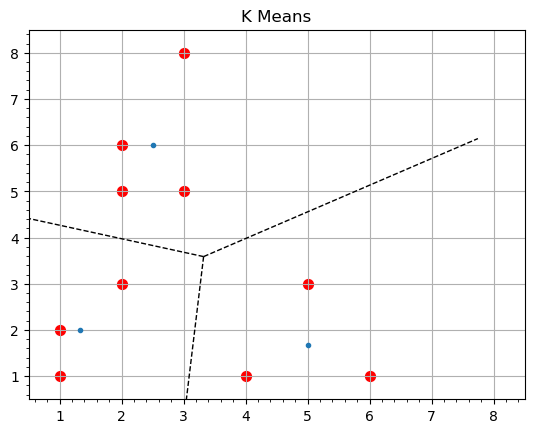

In [10]:
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.animation import FuncAnimation

final, history = kMeans(data=data,epsilon=epsilon,clusters=clusters)

vor = Voronoi(final.round(decimals=2))
padding = 0.5
fig, ax = plt.subplots()
ax.minorticks_on()


voronoi_plot_2d(
    vor,
    ax=ax,
    show_vertices=False,
    line_colors='black',
    line_width=1
)

ax.scatter(data[:,0], data[:,1], c='red', s=50)
ax.grid(True)
ax.set_ylim(dmin - padding,dmax + padding)
ax.set_xlim(dmin - padding,dmax + padding)
ax.set_title("K Means")

plt.show()